In [ ]:
#default_exp metadata

# Metadata Editor

> summary  



In [ ]:
#hide

# documentation extraction for class methods
from nbdev.showdoc import *

# unit tests using test_eq(...)
from fastcore.test import *

# monkey patching class methods using @patch
from fastcore.foundation import *
from fastcore.foundation import patch

# imitation of Julia's multiple dispatch using @typedispatch
from fastcore.dispatch import typedispatch

# bring forth **kwargs from an inherited class for documentation
from fastcore.meta import delegates

In [ ]:
#export

from fastcore.foundation import patch
from fastcore.meta import delegates
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from PIL import Image
from tqdm import tqdm
import warnings
import panel as pn
pn.extension()

from typing import Iterable, Union, Callable, List, TypeVar, Generic, Tuple, Optional
import json
import pickle
from pathlib import Path

/Users/eway/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
#export 

import panel as pn
import panel.widgets as pnw
pn.extension()
from datetime import datetime

"As metadata are shared between National and International repositories, it is becoming increasing important to be able to unambiguously identify and refer to specific records. This is facilitated by including an identifier in the metadata. Some mechanism must exist for ensuring that these identifiers are unique. This is accomplished by specifying the naming authority or namespace for the identifier. It is the responsibility of the manager of the namespace to ensure that the identifiers in that namespace are unique. Identifying the Metadata Convention being used in the file and providing a link to more complete metadata, possibly using a different convention, are also important."

https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3

In [ ]:
#export

identity_fields = [{"Conventions":"Dataset conventions. E.g. CF-1.6, ISO 19115-2, COARDS",},
                   {"id":"Globally unique identifier for the dataset",
                    "naming_authority":"The organization that provides the initial id"},
                   {"metadata_link":"Link to a complete metadata record (or collection)"}]
text_search_fields = [{"title":"A short description of the dataset",
                       "summary":"A paragraph describing the dataset",
                       "keywords":"A comma separated list of key words and phrases"},
                      {"standard_name_vocabulary":"The name of the controlled vocabulary from which variable standard names are taken",
                       "history":"Provides an audit trail for modifications to the original data",
                       "comment":"Miscellaneous information about the data."},
                      {"keywords_vocabulary":"Unique name or identifier of vocabulary from which keywords are taken. E.g. CF:NetCDF COARDS Climate and Forecast Standard Names"}]
extent_search_fields = [{},{"geospatial_lat_min":"Minimum latitude",
                            "geospatial_lat_max":"Maximum latitude",
                            "geospatial_lon_min":"Minimum longitude",
                            "geospatial_lon_max":"Maximum longitude",
                            "time_coverage_start":"Time of first data point using the ISO 8601:2004 date format YYYY-MM-DDThh:mm:ss<zone>",
                            "time_coverage_end":"Time of last data point using the ISO 8601:2004 date format YYYY-MM-DDThh:mm:ss<zone>",
                            "geospatial_vertical_min":"Minimum altitude",
                            "geospatial_vertical_max":"Maximum altitude"},{}]
other_extent_fields = [{},{"geospatial_bounds":"The north, south, east, west bouding box",
                          "geospatial_bounds_crs":"The coordinate reference system (CRS) of the point coordinates geospatial_bounds",
                          "geospatial_bounds_vertical_crs":"The vertical coordinate reference system (CRS) for the Z axis",
                          "time_coverage_duration":"Duration of the dataset in ISO 8601:2004 duration format P[YYYY]-[MM]-[DD]T[hh]:[mm]:[ss]",
                          "time_coverage_resolution":"Time period between each datapoint in ISO 8601:2004 duration format P[YYYY]-[MM]-[DD]T[hh]:[mm]:[ss]"},
                       {"geospatial_lon_units":"Units for the longitude axis usually presumed to be degree_east",
                       "geospatial_lon_resolution":"Spacing of points in longitude with units specified",
                       "geospatial_lat_units":"Units for the longitude axis usually presumed to be degree_north",
                       "geospatial_lat_resolution":"Spacing of points in latitude with units specified",
                       "geospatial_vertical_units":"Units for the vertical axis E.g. EPSG:4979",
                       "geospatial_vertical_resolution":"Certical spacing of points with units specified",
                       "geospatial_vertical_positive":"Choose 'up' or 'down'"}]
creator_search_fields = [{},{"acknowledgment":"acknowledge various type of support for the project that produced this data",
                            "creator_name":"Enter a string here...",
                            "creator_url":"Enter a string here...",
                            "creator_email":"Enter a string here...",
                            "institution":"Enter a string here...",
                            "date_created":"The date on which the data was created",
                            "project":"The scientific project that produced the data"},
                         {"creator_institution":"Enter a string here...",
                         "creator_type":"Choose 'person', 'group', 'institution', or 'position'",
                         "date_modified":"The date on which this data was last modified",
                         "date_metadata_modified":"The date on which this metadata was last modified",
                         "date_issued":"The date on which this data was formally issued"}]
contributor_search_fields = [{},{},{"contributor_name":"Enter a string here...","contributor_role":"Enter a string here..."}]
publisher_search_fields = [{},{"publisher_name":"The data publisher's name. Can be an individual or an institution",
                              "publisher_url":"The data publisher's URL. Can be an individual or an institution",
                              "publisher_email":"The data publisher's email. Can be an individual or an institution"},
                           {"publisher_type":"Choose 'person', 'group', 'institution', or 'position'",
                           "publisher_institution":"Email address of those responsible for publishing the data, with its current metadata and format"}]
other_fields = [{},{"processing_level":"A textual description of the processing (or quality control) level of the data",
                   "license":"Describe the restrictions to data access and distribution",
                   "source":"The method of production of the original data. E.g. model-generated"},
                {"cdm_data_type":"Dataset datatype",
                "instrument":"Name of the contributing instrument(s) or sensor(s) used to create this data set or product",
                "instrument_vocabulary":"Controlled vocabulary for the names used in the `instrument` attribute",
                "platform":"Name of the platform(s) E.g. satellite, ship, station, aircraft",
                "product_version":"Version identifier of the data file or product as assigned by the data creator",
                "program":"The overarching program(s) of which the dataset is a part",
                "references":"Published or web-based references that describe the data or methods used to produce it"}]
instrument_fields = [{},{},{"camera_exposure_time":"Exposure time for each camera frame in ms",
                           "camera_gain":"Gain used for the camera",
                           "camera_row_slice":"Which rows are extracted from each camera frame",
                           "camera_fwhm":"Full Width Half Maximum for spectral bands"}]



In [ ]:
#export

def build_section_widgets(section_name:str = "", fields:List[dict] = [{}], cols:int = 3) -> "panel of text widgets":
    """Construct text input widgets and place them into `cols` columns"""
    wgts_layout = [] 
    wgts = []
    for i in range(len(fields)):
        temp = []  
        for key, val in fields[i].items():
            wgt = pnw.input.TextAreaInput(name=key, placeholder=val, value = None)
            temp.append( wgt )
            wgts.append( wgt )
            
        if   i == 0 and len(fields[i]) > 0:
            wgts_layout.append( pn.Column(pn.pane.Markdown("*Highly Recommended:*"), pn.Row(*temp) ) )
        elif i == 1 and len(fields[i]) > 0:
            wgts_layout.append( pn.Column(pn.pane.Markdown("*Recommended:*"), pn.GridBox(*temp,ncols=cols) ) )
        elif i == 2 and len(fields[i]) > 0:
            wgts_layout.append( pn.Column(pn.pane.Markdown("*Suggested:*"), pn.GridBox(*temp,ncols=cols) ) )
        
    return pn.Column(*wgts_layout), wgts


Standard name table
https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html


In [ ]:
#export

def build_variables_widgets(ds:xr.Dataset, cols:int=3):
    wgts_layout = [pn.pane.Markdown(f"*Highly Recommended:*")] 
    wgts = []
    
    coord_names = [ s.split("(")[0].strip() for s in str(ds.coords).split("*")[1:] ]
    coord_names.append("datacube")
    for n in coord_names:
        temp = []
        if "time" not in n:
            temp.append( pnw.input.TextAreaInput(name="units", placeholder="Units for data variable", value = ds[n].attrs.get("units"),width=150) )
            temp.append( pnw.input.TextAreaInput(name="coverage_content_type", placeholder="ISO 19115-1 code (image, thematicClassification, physicalMeasurement, auxiliaryInformation, qualityInformation, referenceInformation, modelResult, or coordinate)", value = ds[n].attrs.get("coverage_content_type"),width=550) )
        temp.append( pnw.input.TextAreaInput(name="long_name", placeholder="Long descriptive name for the variable (not necessarily from a controlled vocabulary)", value = ds[n].attrs.get("long_name"),width=150) )
        temp.append( pnw.input.TextAreaInput(name="standard_name", placeholder="Long descriptive name for the variable taken from a controlled vocabulary of variable names", value = ds[n].attrs.get("standard_name")) )
        wgts.extend(temp)
        
        wgts_layout.append( pn.Column(pn.pane.Markdown(f"*{n}:*"), pn.GridBox(*temp,ncols=cols) ) )
    
    return pn.Column(*wgts_layout), wgts




In [ ]:
#export

class MetadataEditor():
    """"""
    def __init__(self):
        """"""
        self.event_msg = pnw.StaticText(name="", value="")
        self.title_txt = pn.pane.Markdown("**Interactive Metadata Editor**: ISO 19115-2",)
        self.file_path_box = pnw.input.TextAreaInput(name="NetCDF file path:",placeholder="Enter path string here...",value="")
        self.extract_button = pnw.Button(name="Extract Metadata",button_type="primary",width=150,height=25)
        self.update_button = pnw.Button(name="Update Metadata",button_type="primary",width=150,height=25)
        self.extracted = False
        
        self.update_extract()
        self.update_save()
        
        self.make_widgets()
    
    def __call__(self):
        return pn.Column( self.title_txt, pn.Row( self.file_path_box, pn.Column(self.extract_button,self.update_button),self.event_msg ), self.metadata_tool )
        
    def update_extract(self):
        
        def click_func(event):
            try:
                with xr.open_dataset(self.file_path_box.value) as ds:
                    self.ds = ds.load()
                    self.attrs = ds.attrs
                self.ds.to_netcdf(self.file_path_box.value)
                self.event_msg.value = f"Metadata extracted {self.extract_button.clicks} time(s)"
                
                for w_list in [self.identity_values,self.text_search_values,self.extent_search_values,self.other_extent_values,self.creator_search_values,
                          self.contributor_search_values,self.publisher_search_values,self.other_values]:
                    for w in w_list:
                        w.value = self.attrs.get(w.name)
                        
                if self.extracted is False:
                    self.variables_widgets, self.variables_values = build_variables_widgets(self.ds,cols=2)
                    self.metadata_tabs.extend([("Variables",self.variables_widgets)])
                    self.extracted = True

            except OSError:
                self.event_msg.value = f"No such file or unknown format. Extract button clicked {self.extract_button.clicks} time(s)"
            except ValueError:
                self.event_msg.value = f"Rerun code. Need to input NetCDF file before making changes. Update button clicked {self.update_button.clicks} time(s)"
            
            
        
        self.extract_button.on_click(click_func)
    
    def update_save(self):
        
        def click_func(event):
            try:
                self.attrs = {}
                for w_list in [self.identity_values,self.text_search_values,self.extent_search_values,self.other_extent_values,self.creator_search_values,
                          self.contributor_search_values,self.publisher_search_values,self.other_values,self.instrument_values]:
                    for w in w_list:
                        if w.value is not None:
                            self.attrs[w.name] = w.value
                self.attrs = dict(sorted(self.attrs.items()))
                
                # make new NetCDF file
                coord_names = [ s.split("(")[0].strip() for s in str(self.ds.coords).split("*")[1:] ]
                coord_dict = dict([(c,self.ds[c]) for c in coord_names])
                coord_names.append("datacube")
                self.nc = xr.Dataset(data_vars=dict(datacube=([*coord_names[:3]],self.ds.datacube)),
                                     coords=coord_dict, attrs=self.attrs)
                
                w_count = 0
                for n in coord_names:
                    if "time" not in n:
                        if self.variables_values[w_count].value is not None: 
                            self.nc[n].attrs[self.variables_values[w_count].name] = self.variables_values[w_count].value
                        if self.variables_values[w_count+1].value is not None: 
                            self.nc[n].attrs[self.variables_values[w_count+1].name] = self.variables_values[w_count+1].value
                        w_count += 2
                    if self.variables_values[w_count].value is not None: 
                        self.nc[n].attrs[self.variables_values[w_count].name] = self.variables_values[w_count].value
                    if self.variables_values[w_count+1].value is not None: 
                        self.nc[n].attrs[self.variables_values[w_count+1].name] = self.variables_values[w_count+1].value
                    w_count += 2
                    
                self.nc.to_netcdf(self.file_path_box.value)
                self.event_msg.value = f"Metadata saved to file. Update button clicked {self.update_button.clicks} time(s)"
                
            except AttributeError:
                self.event_msg.value = f"Input valid NetCDF file. Update button clicked {self.update_button.clicks} time(s)"

        self.update_button.on_click(click_func)
    
    def make_widgets(self):
        """widgets!"""
        self.identity_wgts, self.identity_values              = build_section_widgets("Identification / Metadata Reference",identity_fields)
        self.text_search_wgts, self.text_search_values        = build_section_widgets("Text Search",text_search_fields)
        self.extent_search_wgts, self.extent_search_values    = build_section_widgets("Extent Search",extent_search_fields)
        self.other_extent_wgts, self.other_extent_values      = build_section_widgets("Other Extent Information",other_extent_fields)
        self.creator_search_wgts, self.creator_search_values  = build_section_widgets("Creator Search",creator_search_fields)
        self.contributor_search_wgts, self.contributor_search_values  = build_section_widgets("Contributor Search",contributor_search_fields)
        self.publisher_search_wgts, self.publisher_search_values  = build_section_widgets("Publisher Search",publisher_search_fields)
        self.other_wgts, self.other_values                        = build_section_widgets("Other Attributes",other_fields)
        self.instrument_wgts, self.instrument_values              = build_section_widgets("Instrument Attributes",instrument_fields)
        
        self.metadata_tabs = pn.Tabs( ("Identification Reference",self.identity_wgts), 
                                    ("Text",self.text_search_wgts),
                                    ("Extent",self.extent_search_wgts),
                                    ("Other Extent",self.other_extent_wgts),
                                    ("Creator",self.creator_search_wgts),
                                    ("Contributor",self.contributor_search_wgts),
                                    ("Publisher",self.publisher_search_wgts),
                                    ("Other Attributes",self.other_wgts),
                                    ("Instrument",self.instrument_wgts))
        self.metadata_tool = pn.Column( self.metadata_tabs )


In [ ]:
# assets/2021_10_18/09_40_15.nc

me = MetadataEditor()
me()

Column
    [0] Markdown(str)
    [1] Row
        [0] TextAreaInput(name='NetCDF file path:', placeholder='Enter path string h...)
        [1] Column
            [0] Button(button_type='primary', height=25, name='Extract Metadata', sizing_mode='fixed', width=150)
            [1] Button(button_type='primary', height=25, name='Update Metadata', sizing_mode='fixed', width=150)
        [2] StaticText()
    [2] Column
        [0] Tabs
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Row
                        [0] TextAreaInput(name='Conventions', placeholder='Dataset conventions. E.g....)
                [1] Column
                    [0] Markdown(str)
                    [1] GridBox(ncols=3)
                        [0] TextAreaInput(name='id', placeholder='Globally unique i...)
                        [1] TextAreaInput(name='naming_authority', placeholder='The organization t...)
                [2] Column
                    [0] Markdown(str)
                    [1] GridBox(ncols=3)
                        [0] TextAreaInput(name='metadata_link', placeholder='Link to a complete m...)
            [1] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Row
                        [0] TextAreaInput(name='title', placeholder='A short description o...)
                        [1] TextAreaInput(name='summary', placeholder='A paragraph d...)
                        [2] TextAreaInput(name='keywords', placeholder='A comma separated l...)
                [1] Column
                    [0] Markdown(str)
                    [1] GridBox(ncols=3)
                        [0] TextAreaInput(name='standard_name_vocabulary'..., placeholder='The name of t...)
                        [1] TextAreaInput(name='history', placeholder='Provides an a...)
                        [2] TextAreaInput(name='comment', placeholder='Miscellaneous i...)
                [2] Column
                    [0] Markdown(str)
                    [1] GridBox(ncols=3)
                        [0] TextAreaInput(name='keywords_vocabulary', placeholder='Unique name o...)
            [2] Column
                [0] Column
                    [0] Markdown(str)
                    [1] GridBox(ncols=3)
                        [0] TextAreaInput(name='geospatial_lat_min', placeholder='Minimum latitude')
                        [1] TextAreaInput(name='geospatial_lat_max', placeholder='Maximum latitude')
                        [2] TextAreaInput(name='geospatial_lon_min', placeholder='Minimum longitude')
                        [3] TextAreaInput(name='geospatial_lon_max', placeholder='Maximum longitude')
                        [4] TextAreaInput(name='time_coverage_start', placeholder='Time of first d...)
                        [5] TextAreaInput(name='time_coverage_end', placeholder='Time of last d...)
                        [6] TextAreaInput(name='geospatial_vertical_min', placeholder='Minimum altitude')
                        [7] TextAreaInput(name='geospatial_vertical_max', placeholder='Maximum altitude')
            [3] Column
                [0] Column
                    [0] Markdown(str)
                    [1] GridBox(ncols=3)
                        [0] TextAreaInput(name='geospatial_bounds', placeholder='The north, south, ...)
                        [1] TextAreaInput(name='geospatial_bounds_crs', placeholder='The coordinate r...)
                        [2] TextAreaInput(name='geospatial_bounds_vertica..., placeholder='The vertical c...)
                        [3] TextAreaInput(name='time_coverage_duration', placeholder='Duration of t...)
                        [4] TextAreaInput(name='time_coverage_resolution'..., placeholder='Time period b...)
                [1] Column
                    [0] Markdown(str)
                    [1] GridBox(ncols=3)
                        [0] TextAreaInput(name='geospatial_lon_units', placeholder='Units for the l...)
                     

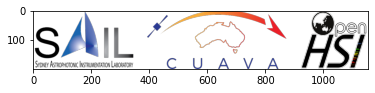

In [ ]:
#hardware

im = Image.open("../../Downloads/logo1.png")
im_arr = np.array( Image.fromarray( np.array(im)[:950,:,:]).resize((240,200)) )
divider = np.zeros((200,40,4),dtype=np.uint8)
im2 = Image.open("../../Downloads/cuava_logo_original.png").resize((481,200))
im2_arr = np.array(im2)
im3 = Image.open("../../Downloads/sail_logo.png")
im3_arr = np.array(im3)[1500:5500]
im3 = Image.fromarray(im3_arr).resize((353,200))
combo = np.hstack((im3,divider,im2_arr,divider,im_arr,))
combo_img = Image.fromarray(combo)
combo_img.save("../../Downloads/combo_logos.png")
plt.imshow(combo)